In [1]:

import pandas as pd
import nltk
import spacy

from nltk.corpus import stopwords
from tqdm import tqdm


In [2]:
nltk.download('stopwords')
nltk.download('punkt')

!python -m spacy download en_core_web_sm


[nltk_data] Downloading package stopwords to /home/bhuvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bhuvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.1 MB/s  0:00:111.1 MB/s eta 0:00:01:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
texts = [
    "Vaccines cause serious side effects according to reports!",
    "5G towers are spreading harmful radiation.",
    "Government confirms vaccine safety after trials.",
    "Social media claims about microchips in vaccines spread rapidly."
]

df = pd.DataFrame({"text": texts})
df


,text
0,Vaccines cause serious side effects according ...
1,5G towers are spreading harmful radiation.
2,Government confirms vaccine safety after trials.
3,Social media claims about microchips in vaccin...


In [4]:
stop_words = set(stopwords.words("english"))
nlp = spacy.load("en_core_web_sm")


In [7]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)

    doc = nlp(text)
    tokens = [
        token.lemma_ 
        for token in doc 
        if token.text not in stop_words and token.is_alpha
    ]

    return " ".join(tokens)


In [8]:
tqdm.pandas()

df["clean_text"] = df["text"].progress_apply(preprocess_text)
df[["text", "clean_text"]]


100%|██████████| 4/4 [00:00<00:00, 140.48it/s]


,text,clean_text
0,Vaccines cause serious side effects according ...,vaccine cause serious side effect accord report
1,5G towers are spreading harmful radiation.,g tower spread harmful radiation
2,Government confirms vaccine safety after trials.,government confirm vaccine safety trial
3,Social media claims about microchips in vaccin...,social medium claim microchip vaccine spread r...


In [9]:
df["word_count"] = df["clean_text"].str.split().apply(len)

df = df[df["word_count"] > 3]
df.reset_index(drop=True, inplace=True)

df.head()


,text,clean_text,word_count
0,Vaccines cause serious side effects according ...,vaccine cause serious side effect accord report,7
1,5G towers are spreading harmful radiation.,g tower spread harmful radiation,5
2,Government confirms vaccine safety after trials.,government confirm vaccine safety trial,5
3,Social media claims about microchips in vaccin...,social medium claim microchip vaccine spread r...,7


In [10]:
df["word_count"].describe()


count    4.000000
mean     6.000000
std      1.154701
min      5.000000
25%      5.000000
50%      6.000000
75%      7.000000
max      7.000000
Name: word_count, dtype: float64

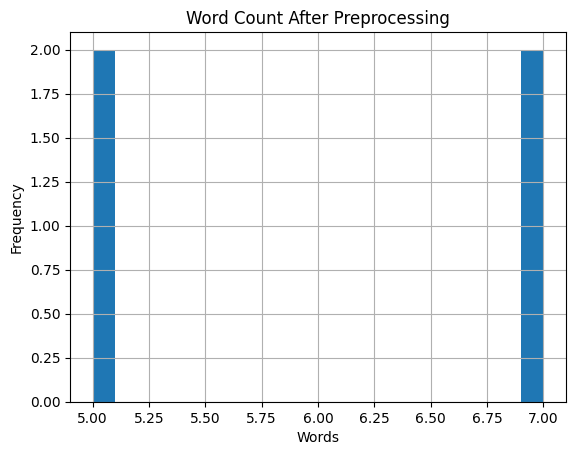

In [11]:
import matplotlib.pyplot as plt

df["word_count"].hist(bins=20)
plt.title("Word Count After Preprocessing")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [12]:
df.to_csv("../data/processed/clean_text_data.csv", index=False)
print("Processed data saved successfully.")


Processed data saved successfully.
